## Puzzles

In [1]:
import zlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image
import awkward as ak
from hist import Hist
import uproot
import vector
vector.register_awkward()

<br><br><br>

### NumPy puzzle 1

In [3]:
array3d = np.arange(2 * 3 * 5).reshape(2, 3, 5)

Write a slice the selects these elements:

<img src="img/array3d-highlight2.svg" width="25%">

In [4]:
array3d

array([[[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14]],

       [[15, 16, 17, 18, 19],
        [20, 21, 22, 23, 24],
        [25, 26, 27, 28, 29]]])

In [13]:
array3d[0, :, 2:]

array([[ 2,  3,  4],
       [ 7,  8,  9],
       [12, 13, 14]])

<br><br><br>

### NumPy puzzle 2

Compute the size of the spaces between consecutive elements in the following array.

In [15]:
array = np.array([1.1, 2.2, 3.3, 4.4, 5.5, 6.6, 7.7, 8.8, 9.9])

**Hint:**

<img src="img/flat-operation.svg" width="40%"><img src="img/shifted-operation.svg" width="40%">

In [16]:
array[1:] - array[:-1]

array([1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1])

In [17]:
np.diff(array)

array([1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1])

<br><br><br>

### NumPy puzzle 3

Compute the length of this curve.

<img src="img/length-by-segment.svg" width="50%">

In [19]:
t = np.linspace(0, 2*np.pi, 10000)
x = np.sin(3*t)
y = np.sin(4*t)

In [20]:
dx = x[1:] - x[:-1]
dy = y[1:] - y[:-1]
r = np.sum(np.sqrt(dx**2 + dy**2))

In [21]:
r

np.float64(21.237210568991465)

In [23]:
x[-1:]

array([-7.34788079e-16])

### NumPy puzzle 4

Scale this image down by a factor of 64 on both sides, using only [np.reshape](https://numpy.org/doc/stable/reference/generated/numpy.reshape.html), [np.mean](https://numpy.org/doc/stable/reference/generated/numpy.mean.html), and [np.ndarray.astype](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.astype.html).

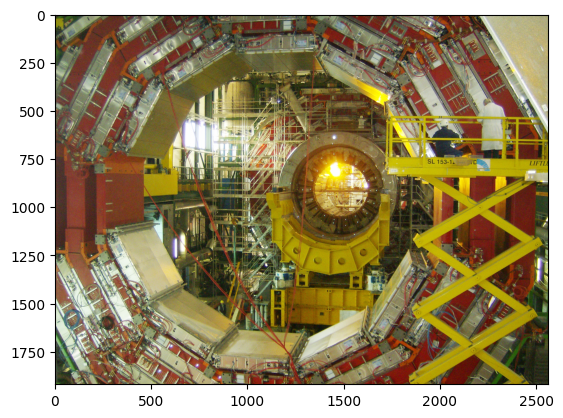

In [40]:
image = matplotlib.image.imread("data/sun-shines-in-CMS.jpg")
plt.imshow(image);

The current shape is

In [25]:
image.shape

(1920, 2560, 3)

1920 rows, 2560 columns, and the third axis is for (red, green, blue), all `np.uint8`.

Your strategy should be to reshape the array, such that the dimension of length `1920` becomes two new dimensions of length `1920 // 64` and `64` and the dimension of length `2560` becomes two new dimensions of length `2560 // 64` and `64`. Then average over each of the dimensions of length `64`.

The shape should change as

$$\left(1920, 2560, 3\right) \to \left(\frac{1920}{64}, 64, \frac{2560}{64}, 64, 3\right) \to \left(\frac{1920}{64}, \frac{2560}{64}, 3\right)$$

and then you need to turn the floating-point dtype back into unsigned 8-bit integers with [np.ndarray.astype](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.astype.html).

In [41]:
newimg = np.mean( np.mean(image.reshape(1920//64, 64, 2560//64, 64, 3), axis=3), axis=1)

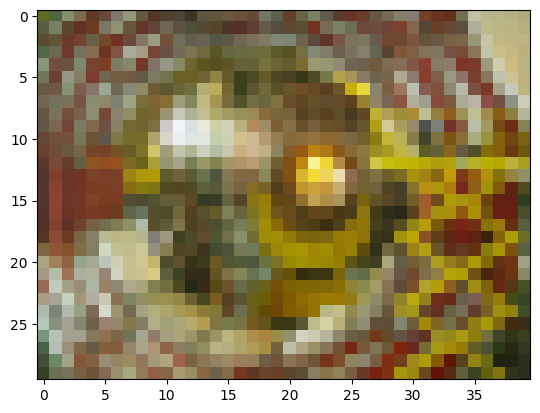

In [42]:
plt.imshow(newimg.astype(np.uint8))

In [31]:
test = np.array([[1, 2, 3, 5],[5, 6, 7, 8]])
test.shape

(2, 4)

In [33]:
test.reshape(4, 2)

array([[1, 2],
       [3, 5],
       [5, 6],
       [7, 8]])

<br><br><br>

### NumPy puzzle 5

In [43]:
with open("data/SMHiggsToZZTo4L.root", "rb") as file:
    file.seek(42104123)
    compressed_data = file.read(14718)
    uncompressed_data = uncompressed_data = zlib.decompress(compressed_data)
    array_of_uint8 = np.frombuffer(uncompressed_data, np.uint8, 12524)

To fix the endianness, you'll need to reverse the order of bytes _in groups of 4_.

<img src="img/big-little-endian.svg" width="65%">

Fix the endianness with only [np.reshape](https://numpy.org/doc/stable/reference/generated/numpy.reshape.html) and a slice.

In [ ]:
byte_swapped = ???

In [ ]:
byte_swapped.view(np.float32)

In [64]:
array_of_uint8.reshape(-1, 4)

array([[ 65,  29,  76,  25],
       [ 65,  70,  33,  44],
       [ 65,  79, 222,  93],
       ...,
       [ 64, 139, 123,   4],
       [ 64, 180,  62, 207],
       [ 64, 152,   6,  99]], shape=(3131, 4), dtype=uint8)

In [65]:
array_of_uint8.reshape(-1, 4)[:, ::-1]

array([[ 25,  76,  29,  65],
       [ 44,  33,  70,  65],
       [ 93, 222,  79,  65],
       ...,
       [  4, 123, 139,  64],
       [207,  62, 180,  64],
       [ 99,   6, 152,  64]], shape=(3131, 4), dtype=uint8)

<br><br><br>

### NumPy puzzle 6

In [66]:
text = """
WOULD YOU LIKE GREEN EGGS AND HAM?

I DO NOT LIKE THEM, SAM-I-AM.
I DO NOT LIKE GREEN EGGS AND HAM.

WOULD YOU LIKE THEM HERE OR THERE?

I WOULD NOT LIKE THEM HERE OR THERE.
I WOULD NOT LIKE THEM ANYWHERE.
I DO NOT LIKE GREEN EGGS AND HAM.
I DO NOT LIKE THEM, SAM-I-AM.

WOULD YOU LIKE THEM IN A HOUSE?
WOULD YOU LIKE THEN WITH A MOUSE?

I DO NOT LIKE THEM IN A HOUSE.
I DO NOT LIKE THEM WITH A MOUSE.
I DO NOT LIKE THEM HERE OR THERE.
I DO NOT LIKE THEM ANYWHERE.
I DO NOT LIKE GREEN EGGS AND HAM.
I DO NOT LIKE THEM, SAM-I-AM.

WOULD YOU EAT THEM IN A BOX?
WOULD YOU EAT THEM WITH A FOX?

NOT IN A BOX. NOT WITH A FOX.
NOT IN A HOUSE. NOT WITH A MOUSE.
I WOULD NOT EAT THEM HERE OR THERE.
I WOULD NOT EAT THEM ANYWHERE.
I WOULD NOT EAT GREEN EGGS AND HAM.
I DO NOT LIKE THEM, SAM-I-AM.
"""

1. Using `dictionary` and `index`, can you reconstruct the original list of words?

2. Find first five occurrences of a word.

3. Try rebuilding the original text (without punctuation) using only `dictionary` and `index`.

4. Plot the top 5 most frequent words.

5. Detect bigrams (e.g. "GREEN EGGS").

In [ ]:
words = np.array(text.replace(",", " ").replace(".", " ").replace("?", " ").replace("!", " ").replace("-", " ").split())
dictionary, index = np.unique(words, return_inverse=True)

<br><br><br>

### Awkward puzzle 1

In [67]:
with uproot.open("data/SMHiggsToZZTo4L.root", handler=uproot.MemmapSource) as file:
    dataset = file["Events"].arrays()

In [68]:
EVENT = 0
PARTICLE = 1

Are the muon $p_T$ values sorted within each event? That is, is it true that

```python
dataset.Muon_pt[i, j] > dataset.Muon_pt[i, j + 1]
```

for all `i` and `j`? Perform a calculation that proves it.

<details>
    <summary style="font-weight: bold;">Hint!</summary>

<p>Think about NumPy puzzle 2.</p>

</details>

In [74]:
ak.all(dataset.Muon_pt[:, :-1] > dataset.Muon_pt[:, 1:])

np.False_

In [75]:
dataset.Muon_pt[:, :-1] > dataset.Muon_pt[:, 1:]

<Array [[True, True], [], [], ..., [...], [], []] type='299973 * var * bool'>

<br><br><br>

### Awkward puzzle 2

In [69]:
boolean_mask = dataset.Muon_pt > 50
boolean_mask

<Array [[True, False, False], [], [], ..., [], []] type='299973 * var * bool'>

In [70]:
dataset.Muon_pt[boolean_mask]

<Array [[63], [], [], [...], ..., [], [], [], []] type='299973 * var * float32'>

Notice that this has filtered _particles_, rather than _events_. That's because `dataset.Muon_pt` and `boolean_mask` are both ragged (with the same numbers of elements in each list).

Suppose you want to select "any event with a muon whose $p_T > 50$ GeV"? Here are some potentially useful functions (there are several ways to do it):

* [ak.any](https://awkward-array.org/doc/main/reference/generated/ak.any.html)
* [ak.max](https://awkward-array.org/doc/main/reference/generated/ak.max.html)
* [ak.num](https://awkward-array.org/doc/main/reference/generated/ak.num.html)
* [ak.count_nonzero](https://awkward-array.org/doc/main/reference/generated/ak.count_nonzero.html) (or [ak.sum](https://awkward-array.org/doc/main/reference/generated/ak.sum.html))

<br><br><br>

### Awkward puzzle 3

Make a boolean mask for selecting events in which any electron $p_T > 10$ and any muon $p_T > 5$ GeV.

<br><br><br>

### Awkward puzzle 4

Using [ak.num](https://awkward-array.org/doc/main/reference/generated/ak.num.html), select events with exactly two muons and make separate arrays (`mu1`, `mu2`) of those two muons.

<br><br><br>

### Awkward puzzle 5

In [ ]:
electrons = ak.zip({
    "pt": dataset.Electron_pt,
    "phi": dataset.Electron_phi,
    "eta": dataset.Electron_eta,
    "mass": dataset.Electron_mass,
    "charge": dataset.Electron_charge,
}, with_name="Momentum4D")

In [ ]:
muons = ak.zip({
    "pt": dataset.Muon_pt,
    "phi": dataset.Muon_phi,
    "eta": dataset.Muon_eta,
    "mass": dataset.Muon_mass,
    "charge": dataset.Muon_charge,
}, with_name="Momentum4D")

Now you're ready to compute dimuon masses.

1. Select events with exactly two muons and put each of those muons in separate arrays, as you did in puzzle 4 (but make them arrays of muon _objects_, not just muon $p_T$).
2. For each event, add those muon objects together with `+`.
3. Get the `mass` property from the Lorentz-added vectors.

It should look like

```
[87.1,
 90.5,
 89.2,
 18.8,
 4.59,
 37.2,
 90.6,
 8.91,
 18.1,
 27.5,
 ...,
 31.2,
 0.762,
 14.3,
 90.7,
 90,
 88.6,
 88.8,
 27.9,
 90.5]
---------------------
type: 85838 * float32
```

In [ ]:
def quickplot(num_bins, low, high, array, label=""):
    return Hist.new.Reg(num_bins, low, high, label=label).Double().fill(array)

<br><br><br>

### Awkward puzzle 6

<table>
    <tr style="background: white; text-align: center; font-size: 18pt">
        <td>ak.cartesian</td><td>ak.combinations</td>
    </tr>
    <tr style="background: white">
        <td><img src="img/cartoon-cartesian.svg" width="300"></td>
        <td><img src="img/cartoon-combinations.svg" width="300"></td>
    </tr>
</table>

In [ ]:
numbers = ak.Array([[1, 2, 3], [], [4]])
letters = ak.Array([["a", "b"], ["c"], ["d", "e"]])

ak.cartesian([numbers, letters], axis=1)

is equivalent to

In [ ]:
for numbers_list, letters_list in zip(numbers, letters):
    print("[", end="")
    for number in numbers_list:
        for letter in letters_list:
            print(f"({number}, {letter}), ", end="")
    print("]")

<br><br><br>

In [ ]:
numbers = ak.Array([[1.1, 2.2, 3.3, 4.4], [], [5.5, 6.6]])

ak.combinations(numbers, 2, axis=1)

is equivalent to

In [ ]:
for numbers_list in numbers:
    print("[", end="")
    for i in range(len(numbers_list)):
        for j in range(i + 1, len(numbers_list)):
            print(f"({numbers_list[i]}, {numbers_list[j]}), ", end="")
    print("]")

<br><br><br>

Use these separate-charge collections, [ak.cartesian](https://awkward-array.org/doc/main/reference/generated/ak.cartesian.html), and [ak.unzip](https://awkward-array.org/doc/main/reference/generated/ak.unzip.html) to make a plot of opposite-sign dimuons.

In [ ]:
muon_plus = muons[muons.charge > 0]
muon_minus = muons[muons.charge < 0]

<br><br><br>

### Awkward puzzle 7

Using `muon_plus`, `muon_minus` and

In [ ]:
electron_plus = electrons[electrons.charge > 0]
electron_minus = electrons[electrons.charge < 0]

find quadruples of $e^+$, $e^-$, $\mu^+$, $\mu^-$ (without cuts) and plot a Higgs peak at 125 GeV. Remember to [ak.flatten](https://awkward-array.org/doc/main/reference/generated/ak.flatten.html) the ragged array of masses before plotting.

<img src="img/higgs-to-four-leptons-diagram.png" width="50%">

<br><br><br>

### Awkward puzzle 8

Using `muon_plus` and `muon_minus`, find quadruples of $\mu^+$, $\mu^-$, $\mu^+$, $\mu^-$ (without cuts) and plot a Higgs peak.

Very important: don't include the same muon twice! An individual muon can't be the decay product of one Z _and_ the other Z.

<img src="img/higgs-to-four-leptons-diagram-2.png" width="50%">

<br><br><br>

### Awkward puzzle 9

In [ ]:
EVENT = 0
PARTICLE = 1
PARTICLE2 = 2

Although it isn't physically relevant in this sample, let's try computing $\Delta R$ between all electrons and muons.

In [ ]:
e_mu_pairs = ak.cartesian([electrons, muons], nested=True)

In [ ]:
e_grouped, mu_grouped = ak.unzip(e_mu_pairs)

In [ ]:
deltaR = e_grouped.deltaR(mu_grouped)

Find the one muon that is closest in $\Delta R$ to each electron (or `None` if the event has no muons). Use [ak.argmin](https://awkward-array.org/doc/main/reference/generated/ak.argmin.html) with `keepdims=True`.

It should look like this:

```
[[],
 [None, None, None, None],
 [None, None],
 [{pt: 23.5, phi: -0.307, eta: -0.248, mass: 0.106, charge: -1}],
 [None, None, None, None],
 [{pt: 47, phi: -1.15, eta: -0.119, mass: 0.106, charge: 1}],
 [{pt: 4.45, phi: 1.12, eta: -0.986, mass: 0.106, charge: 1}],
 [None],
 [None, None, None, None],
 [],
 ...,
 [{pt: 37.2, phi: -0.875, eta: 1.1, mass: 0.106, charge: -1}, {...}],
 [{pt: 24, phi: 1.38, eta: 0.421, mass: 0.106, charge: -1}],
 [],
 [None, None, None],
 [],
 [{pt: 43.1, phi: 2.27, eta: -0.162, mass: 0.106, charge: -1}],
 [],
 [None, None],
 [None, None]]
---------------------------------------------------------------------
type: 299973 * var * ?Momentum4D[
    pt: float32,
    phi: float32,
    eta: float32,
    mass: float32,
    charge: int32
]
```